## 1. Load the shared library

In [1]:
import ctypes
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

if sys.platform == 'darwin':
    libname = './distlib.dylib'
else:
    libname = './distlib.so'

lib = ctypes.cdll.LoadLibrary(libname)

In [2]:
# Declare return types
lib.dnorm.restype = ctypes.c_double
lib.dlogis.restype = ctypes.c_double
lib.pnorm.restype = ctypes.c_double
lib.plogis.restype = ctypes.c_double

## 2. Visualize PDF

In [3]:
# Parameters of distribution
mu = 0.0
sd = 1.0

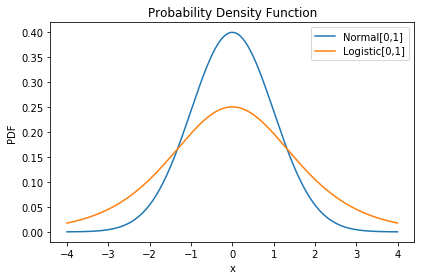

In [4]:
x_vals = np.linspace(-4, 4, 200)
# Call dnorm() function for every x in x_vals
y_vals_dnorm = [lib.dnorm(ctypes.c_double(x), ctypes.c_double(mu), ctypes.c_double(sd)) for x in x_vals]
# Call dlogis() function for every x in x_vals
y_vals_dlogis = [lib.dlogis(ctypes.c_double(x), ctypes.c_double(mu), ctypes.c_double(sd)) for x in x_vals]

plt.plot(x_vals, y_vals_dnorm, label='Normal[0,1]')
plt.plot(x_vals, y_vals_dlogis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Probability Density Function')
plt.legend(loc='best')
plt.tight_layout()

## 3. Visualize CDF

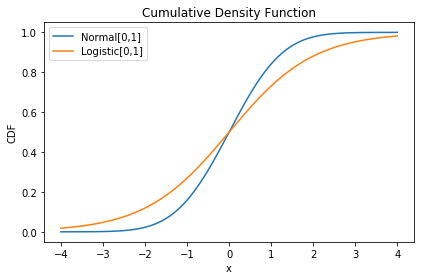

In [5]:
x_vals = np.linspace(-4, 4, 200)
# Call pnorm() function for every x in x_vals
y_vals_pnorm = [lib.pnorm(ctypes.c_double(x), ctypes.c_double(mu), ctypes.c_double(sd)) for x in x_vals]
# Call plogis() function for every x in x_vals
y_vals_plogis = [lib.plogis(ctypes.c_double(x), ctypes.c_double(mu), ctypes.c_double(sd)) for x in x_vals]

plt.plot(x_vals, y_vals_pnorm, label='Normal[0,1]')
plt.plot(x_vals, y_vals_plogis, label='Logistic[0,1]')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Cumulative Density Function')
plt.legend(loc='best')
plt.tight_layout()